In [50]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

In [23]:
def readfile(filename):
    # open file
    f = open(filename,'r')
    
    # read header info line by line 

    # read first two lines FIRST 
    line = f.readline()
    label, value = line.split()
    time = float(value)

    line = f.readline()
    label, value = line.split()
    total = float(value)
    
    # close file
    f.close()

    # read the remainder of the file, skipping 
    #the first 3 lines and storing 
    #the values as arrays with the column headers 
    #given in line 4
    data = np.genfromtxt(filename, dtype=None, names=True, skip_header=3)
    
    # this will return the time of the snapshot, 
    #total number of particles 
    #and an array that stores the remainder of the data. 
    return time, total, data

In [24]:
def COMDef(x,y,z,m):
    # compute the center of mass 
    # note: since all particles have the same
    # mass when consider only one type
    # this is equivalently  np.sum(x)/len(x)
    
    # xcomponent
    cXP = np.sum(x*m)/np.sum(m)
    # ycomponent
    cYP = np.sum(y*m)/np.sum(m)
    # zcomponent
    cZP = np.sum(z*m)/np.sum(m)
    
    return cXP,cYP,cZP

In [25]:
# function to compute the POSITION and 
# VELOCITY of the center of mass of Galaxy X 
#using particles of Type Y at SnapNumber Z 

# input: String with Galaxy Name
# input: 1,2,3 indicating particle type
# input: Integer with Snapshot Number  e.g. 0,256,700
# input:  Delta = tolerance for the iteration
# input:  dec = factor by which to decrease the search radius
# Return: Array of  ( time, x, y, z) of center of mass 

def COM(galaxy, PType, Snap, delta,dec):

    # Read in the Right file, identified by "Galaxy" and "Snap"

     # add a string of the filenumber to the value "000" 
    ilbl = '000' + str(Snap)
        # remove all but the last 3 digits
    ilbl = ilbl[-3:]
        # create filenames 
    filename=galaxy + "_" + ilbl + '.txt'
    #print filename
    
    # read in the filename 
    time, total, data = readfile(filename)
     # identify all particles of required type
    index = np.where(data['type']== float(PType))

    
    # LOAD positions of particles of required type

    # store x position of particles 
    xP = data['x'][index]
    # store y position of particles
    yP = data['y'][index]
    # store z position of particles 
    zP = data['z'][index]
     # store x position of particles 
    vxP = data['vx'][index]
    # store y position of particles
    vyP = data['vy'][index]
    # store z position of particles 
    vzP = data['vz'][index]
   
    # store mass of all particles of required type
    mP = data['m'][index]

    # compute the center of mass position using all
    # particles of given type
    cXP, cYP, cZP = COMDef(xP,yP,zP,mP)
    
    # compute the center of mass velocity using all 
    # particles of given type
    cVXP, cVYP, cVZP = COMDef(vxP,vyP,vzP,mP)
    
    ##############
    # FOR TESTING
    ##############
    # print the center of mass position (x,y,z) relative to 0,0,0
    # using all particles of given type (no position cuts)
    #print "Center of Mass Position", cXP, cYP, cZP
    # compute the magnitude
    #cRP = np.sqrt(cXP**2 + cYP**2 + cZP**2) 
    #print "Magnitude", cRP
 
    #print "Center of Mass Velocity", cVXP, cVYP, cVZP
    # compute the magnitude
    #cVP = np.sqrt(cVXP**2 + cVYP**2 + cVZP**2) 
    #print "Magnitude", cVP
    ####################
    
    
    #  start an iterative process to determine the center of mass 
      
    # compute difference between particle coordinates 
    # and first stab at COM
    xNew = xP - cXP
    yNew = yP - cYP
    zNew = zP - cZP
    rNew = np.sqrt(xNew**2.0 + yNew**2.0 +zNew**2.0)
    
    # find the max distance of the particle from COM
    # start at half that radius
    maxR2 = max(rNew)/2.0
    #print "MAX", max(rNew)
    
    
    # set an initial disparity for the COM
    diff = 100.0 
    
    # while the difference between COM positions are greater than delta
    # continue iteration by checking 1/2 radius
    while(diff > delta):
                
        # identify particles within some fraction of the max radius
        indexN = np.where(rNew < float(maxR2))
        
        # make sure there are enough particles for the COM
        # calculation to be meaningful
        # here set for 100 particles 
        if (len(indexN[0][:]) < 100):
            print "Too Small"
            break
        
        
        # compute COM using only those particles within maxR2
        cXPnew, cYPnew, cZPnew = COMDef(xP[indexN],yP[indexN],zP[indexN],mP[indexN])
        
        # compute the COM velocity for these particles within maxR2 
        cVXPnew, cVYPnew, cVZPnew = COMDef(vxP[indexN],vyP[indexN],vzP[indexN],mP[indexN])        
        
        # what is the difference between this new COM and the previous one
        # check difference in each component of the vector
        dX = np.abs(cXP - cXPnew)
        dY = np.abs(cYP - cYPnew)
        dZ = np.abs(cZP - cZPnew)
        dArray = [dX,dY,dZ]
        diff = np.max(dArray)
        #Could have also checked difference with the magnitude of the vector
        #diff = np.sqrt(dX**2 + dY**2 + dZ**2)

        # reset the scenario for the next iteration
        
        # we assume the new COM  is more accurate than the previous one 
        # so we save the new COM 
        cXP = cXPnew
        cYP = cYPnew
        cZP = cZPnew
        cVXP = cVXPnew
        cVYP = cVYPnew
        cVZP = cVZPnew
        
        # reset the difference between particle position and new COM
        xNew = xP - cXP
        yNew = yP - cYP
        zNew = zP - cZP
        
        # compute magnitude of distance from new COM
        rNew = np.sqrt(xNew**2.0 + yNew**2.0 +zNew**2.0)
        

        # TESTING THE PROCESS ABOVE
        ############################
        #print "decreased maxR", maxR2
        #print diff
        #print (diff > delta)
        #############################
        
        # for next iteration start at an even smaller radius based on 
        # input, dec
        # it seems that 1/4 yields better results than dividing by 2. 
        maxR2 = max(rNew[indexN])/dec
        
        
    # store time and x,y,z  position of COM to an array
    COMP = [time, round(cXP),round(cYP),round(cZP),round(cVXP),round(cVYP),round(cVZP)]
    
    # print the magnitude of the COM 
    #print "%s Center of Mass position using particle type %s is" %(galaxy,PType), round(np.sqrt(cXP**2+ cYP**2+ cZP**2)), "kpc"
    #print "%s Center of Mass velocity using particle type %s is" %(galaxy,PType), round(np.sqrt(cVXP**2+ cVYP**2+ cVZP**2)), "km/s"
    #print "%s Center of mass position vector using particle type %s" %(galaxy,PType), COMP[1],COMP[2],COMP[3]
    #print "%s Center of mass velocity vector using particle type %s" %(galaxy,PType), COMP[4],COMP[5],COMP[6]
    
    # return the array with stored quantities 
    return COMP


In [26]:
# Write a code that will loop over as many snapshots as specified
# and write the COM motions to a file

# input:  starting snapnumber
# input:  ending snapnumber
def Orbit(start, end):
    
    # COM parameters
    
    # tolerance
    delta = 2.0 
    # decreasing radius factor
    dec = 4.0
    # Particle type
    Ptype = 2.0
    
    # for M33 we adopt a different tolerance 
    deltaM33 = 0.5
    
    
    # open files to store the outputs
    foMW = open('centerOfMass_MW.txt', 'w')
    foM31 = open('centerOfMass_M31.txt','w')    
    foM33 = open('centerOfMass_M33.txt','w')
    
    # print to file a row that stores columns
    toprint = '#t, xC, yC, zC, vxC, vyC, vzC'+'\n'
    foMW.write(toprint)
    foM31.write(toprint)
    foM33.write(toprint)
    
    # start the counter at the first snapshot
    count = start
    
    # loop over all snapshots to store the COM
    while (count < end +1):
        
        # call COM code
        MW = COM("MW",Ptype,count,delta,dec)
        M31 = COM("M31",Ptype,count,delta,dec)
        M33 = COM("M33",Ptype,count,deltaM33,dec)
         
        # print MW data to a file 
        toprint = str(MW[0])+"\t"+str(MW[1])+"\t"+str(MW[2])+"\t"+str(MW[3])+"\t"+str(MW[4])+"\t"+str(MW[5])+"\t"+str(MW[6])    
        foMW.write(toprint) # print above to a file
        foMW.write('\n')    # add a new line 
        
        # print M31 data to a file 
        toprint = str(M31[0])+"\t"+str(M31[1])+"\t"+str(M31[2])+"\t"+str(M31[3])+"\t"+str(M31[4])+"\t"+str(M31[5])+"\t"+str(M31[6])    
        foM31.write(toprint) # print above to a file
        foM31.write('\n')    # add a new line 
        
        # print M33 data to a file
        toprint = str(M33[0])+"\t"+str(M33[1])+"\t"+str(M33[2])+"\t"+str(M33[3])+"\t"+str(M33[4])+"\t"+str(M33[5])+"\t"+str(M33[6])    
        foM33.write(toprint) # print above to a file
        foM33.write('\n')    # add a new line 
        
        #update counter
        count = count +1
        print count

    

In [44]:
Orbit(0,700)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [27]:
def readCOMfile(filename):
    # open file
    f = open(filename,'r')

    # read the remainder of the file, skipping 
    #the first 3 lines and storing 
    #the values as arrays with the column headers 
    #given in line 1
    data = np.genfromtxt(filename, dtype=None, names=True)
    
    # return array that stores the data. 
    return data

In [28]:
def MagnitudeVector(a,b,c,d,e,f):
    return np.sqrt((a-d)**2 + (b-e)**2 + (c-f)**2)

In [29]:
# read in the COM files 
dMW = readCOMfile("centerOfMass_MW.txt")
dM31 = readCOMfile("centerOfMass_M31.txt")
dM33 = readCOMfile("centerOfMass_M33.txt")

# store the difference between the positions 
rMWM31 = MagnitudeVector(dMW['xC'],dMW['yC'],dMW['zC'],dM31['xC'],dM31['yC'],dM31['zC'])
rMWM33 = MagnitudeVector(dMW['xC'],dMW['yC'],dMW['zC'],dM33['xC'],dM33['yC'],dM33['zC'])
rM31M33 = MagnitudeVector(dM31['xC'],dM31['yC'],dM31['zC'],dM33['xC'],dM33['yC'],dM33['zC'])

# store the difference between the velocities
vMWM31 = MagnitudeVector(dMW['vxC'],dMW['vyC'],dMW['vzC'],dM31['vxC'],dM31['vyC'],dM31['vzC'])
vMWM33 = MagnitudeVector(dMW['vxC'],dMW['vyC'],dMW['vzC'],dM33['vxC'],dM33['vyC'],dM33['vzC'])
vM31M33 = MagnitudeVector(dM31['vxC'],dM31['vyC'],dM31['vzC'],dM33['vxC'],dM33['vyC'],dM33['vzC'])


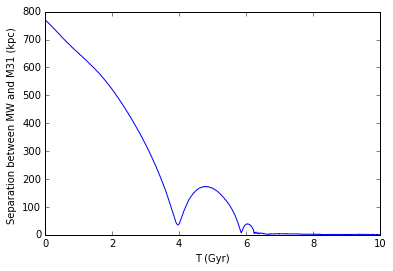

In [30]:
# Create a plot of position between the MW and M31
plt.plot(dMW['t'][:]/1000., rMWM31)
plt.ylabel('Separation between MW and M31 (kpc) ')
plt.xlabel('T (Gyr)')


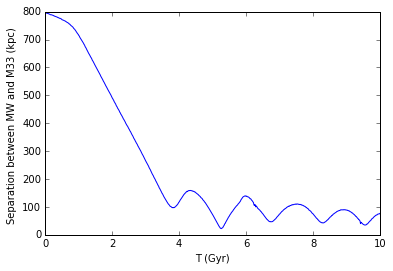

In [31]:
# Create a plot between the MW and M33
plt.plot(dMW['t'][:]/1000., rMWM33)
plt.ylabel('Separation between MW and M33 (kpc) ')
plt.xlabel('T (Gyr)')

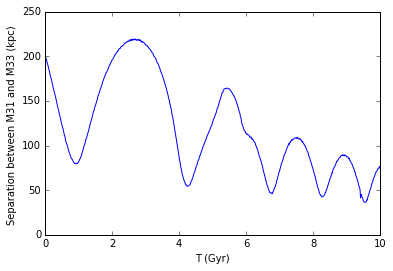

In [32]:
# Create a plot between the M31 and M33
plt.plot(dM31['t'][:]/1000., rM31M33)
plt.ylabel('Separation between M31 and M33 (kpc) ')
plt.xlabel('T (Gyr)')

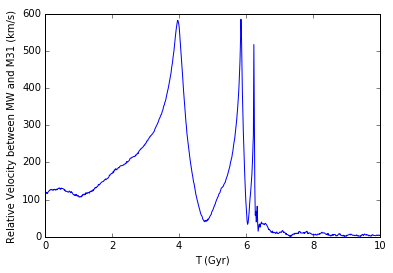

In [70]:
# Create a plot of velocity between the MW and M31
plt.plot(dMW['t'][:]/1000., vMWM31)
plt.ylabel('Relative Velocity between MW and M31 (km/s) ')
plt.xlabel('T (Gyr)')

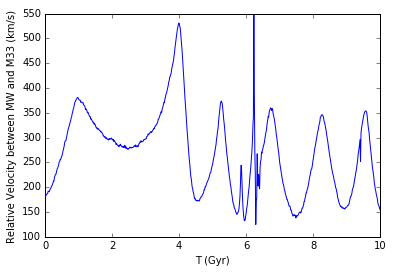

In [71]:
# Create a plot of velocity between the MW and M33
plt.plot(dMW['t'][:]/1000., vMWM33)
plt.ylabel('Relative Velocity between MW and M33 (km/s) ')
plt.xlabel('T (Gyr)')

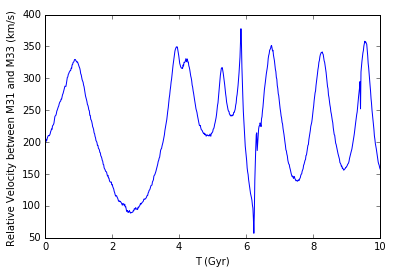

In [72]:
# Create a plot of velocity between the M31 and M33
plt.plot(dM31['t'][:]/1000., vM31M33)
plt.ylabel('Relative Velocity between M31 and M33 (km/s) ')
plt.xlabel('T (Gyr)')

Question 7:  
MW & M31:  3 close encounters (final one being merger)
M33 & MW : 5 close encounters
M33 & M31 : 5 close encounters

Question 8:
The separation between the galaxies decreases and increases over time as the galaxies interact, 
but overall the separation is decaying over time. 
Separation and Velocity are linked by Energy Conservation. As the separation decreases,
the velocity increases.


Question 9: 
The galaxies merge completely after ~ 6.25 Gyr (separation < 10 kpc and stays that way)
They merge because the energy is not conserved - overall the position is decreasing over time, as is the velocity. This is because of "dynamical friction" - the galaxies are subject to a friction term owing to their motions through each others dark matter halos. 
Dynamical friction is proportional the mass of the object squared - M33 is less massive than the others, and so suffers the least amount of friction. It will eventually merge, as the separation between M33 and the MW-M31 merged product is decaying over time, but it will take a long time. 

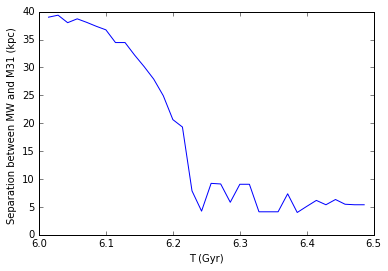

In [73]:
# checking merger time
ttt = dMW['t']/1000.
indexMerge = np.where((ttt > 6) & (ttt< 6.5) )
plt.plot(ttt[indexMerge], rMWM31[indexMerge])
plt.ylabel('Separation between MW and M31 (kpc) ')
plt.xlabel('T (Gyr)')

32.0 -57.0


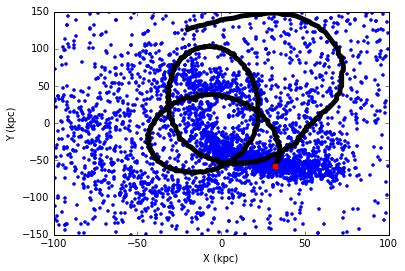

In [40]:
# BONUS
# loading points at snap 700
timeA, totalA, dataA = readfile("M33_700.txt")
M33COM = COM("M33",2,700,0.5,4)
M31COM = COM("M31",2,700,2,4)
# correcting positions of M33 particles 
# to make them relative to COM of MW
xnew = dataA['x']-M31COM[1]
ynew = dataA['y']-M31COM[2]
znew = dataA['z']-M31COM[3]
mnew = dataA['m']
indexP = np.where((np.abs(xnew)<100) &(np.abs(ynew)<150))
xnewXY = xnew[indexP]
ynewXY = ynew[indexP]
znewXY = znew[indexP]

# identifying current location of M33
xCOM = M33COM[1]-M31COM[1]
yCOM = M33COM[2]-M31COM[2]
zCOM = M33COM[3]-M31COM[3]
print xCOM, yCOM

# find the orbit (t > 5 ) Gyr ago
indexT = np.where(dM33['t']/1000. > 5)
xOnew = dM33['xC'][indexT] - dM31['xC'][indexT]
yOnew = dM33['yC'][indexT] - dM31['yC'][indexT]
zOnew = dM33['zC'][indexT] - dM31['zC'][indexT]
 
    
# CREATE PLOT
# plot data points    
plt.plot(xnewXY,ynewXY, '.')
# plot orbit
plt.plot(xOnew,yOnew, 'k-', lw=5)
# plot COM location of M33 
plt.plot(xCOM, yCOM, 'rs')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')




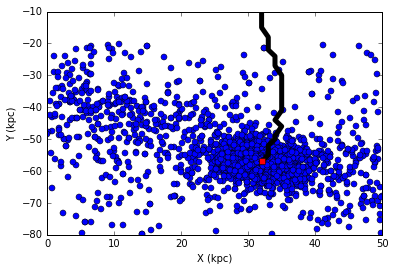

In [42]:
# BONUS:  ZOOM of the above on COM location of M33

indexZ = np.where((xnew < 50) & (xnew > 0) &(ynew <-20) & (ynew > -80))
xnewZ = xnew[indexZ]
ynewZ = ynew[indexZ]
znewZ = znew[indexZ]

# find the orbit (t > 9.75 ) Gyr ago
indexZ = np.where(dM33['t']/1000. > 9.75) 
xOnewZ = dM33['xC'][indexZ] - dM31['xC'][indexZ]
yOnewZ = dM33['yC'][indexZ] - dM31['yC'][indexZ]
zOnewZ = dM33['zC'][indexZ] - dM31['zC'][indexZ]
    
plt.plot(xnewZ,ynewZ, 'o')
plt.plot(xOnewZ,yOnewZ, 'k-', lw=5)
plt.plot(xCOM, yCOM, 'rs')
plt.xlabel('X (kpc)')
plt.ylabel('Y (kpc)')

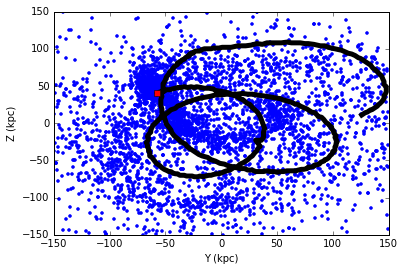

In [43]:
# BONUS
# YZ PLANE 
indexPYZ = np.where((np.abs(znew)<150) &(np.abs(ynew)<150))
xnewYZ = xnew[indexPYZ]
ynewYZ = ynew[indexPYZ]
znewYZ = znew[indexPYZ]
# CREATE PLOT
# plot data points    
plt.plot(ynewYZ,znewYZ, '.')
# plot orbit
plt.plot(yOnew,zOnew, 'k-', lw=5)
# plot COM location of M33 
plt.plot(yCOM, zCOM, 'rs')
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')


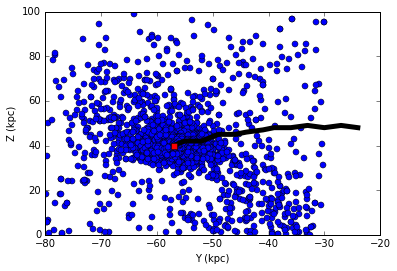

In [48]:
# BONUS:  ZOOM of the above on COM location of M33
# loading points at snap 700

indexPYZ2 = np.where((znew < 100) & (znew > 0) &(ynew <-30) & (ynew > -80))
xnewYZ2 = xnew[indexPYZ2]
ynewYZ2 = ynew[indexPYZ2]
znewYZ2 = znew[indexPYZ2]

# find the orbit (t > 9.8 ) Gyr ago
indexT = np.where(dM33['t']/1000. > 9.8) 
xOnewYZ = dM33['xC'][indexT] - dM31['xC'][indexT]
yOnewYZ = dM33['yC'][indexT] - dM31['yC'][indexT]
zOnewYZ = dM33['zC'][indexT] - dM31['zC'][indexT]
    
plt.plot(ynewYZ2,znewYZ2, 'o')
plt.plot(yOnewYZ,zOnewYZ, 'k-', lw=5)
plt.plot(yCOM, zCOM, 'rs')
plt.xlabel('Y (kpc)')
plt.ylabel('Z (kpc)')

The debris trail from M33 looks almost orthogonal to the orbit !!!

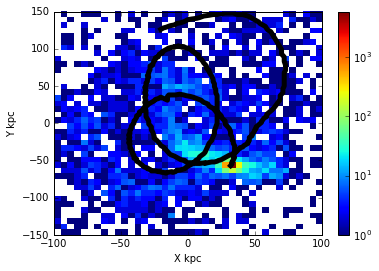

In [52]:
# BONUS

    
# CREATE PLOT
# From Ryan Hoffman: 
from matplotlib.colors import LogNorm
plt.hist2d(xnewXY, ynewXY, bins=40, norm=LogNorm())
plt.plot(xOnew, yOnew, 'k-', lw=5)
plt.xlabel('X kpc')
plt.ylabel('Y kpc')
plt.colorbar()
plt.show()






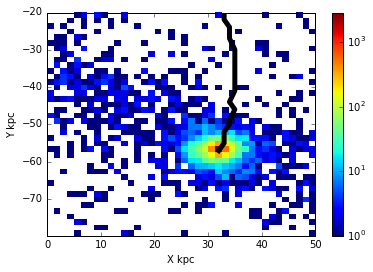

In [53]:
# Zoom
# From Ryan Hoffman: 
from matplotlib.colors import LogNorm
plt.hist2d(xnewZ, ynewZ, bins=40, norm=LogNorm())
plt.plot(xOnewZ, yOnewZ, 'k-', lw=5)
plt.xlabel('X kpc')
plt.ylabel('Y kpc')
plt.colorbar()
plt.show()
